In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

**InvoiceNo**: Número da fatura. Nominal. Um número inteiro de 6 dígitos atribuído de forma única a cada transação. Se esse código começar com a letra 'c', indica um cancelamento.

**StockCode**: Código do produto (item). Nominal. Um número inteiro de 5 dígitos atribuído de forma única a cada produto distinto.

**Description**: Nome do produto (item). Nominal.

**Quantity**: As quantidades de cada produto (item) por transação. Numérico.

**InvoiceDate**: Data e hora da fatura. Numérico. O dia e a hora em que a transação foi gerada.

**UnitPrice**: Preço unitário. Numérico. Preço do produto por unidade em libras esterlinas (£).

**CustomerID**: Número do cliente. Nominal. Um número inteiro de 5 dígitos atribuído de forma única a cada cliente.

**Country**: Nome do país. Nominal. O nome do país onde o cliente reside.

In [3]:
df = pd.read_excel('trabalho001_v2/data/online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [4]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [45]:
df.loc[df['Invoice'] == 'C581490']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df['Invoice'] = df['Invoice'].astype(str)
df['Customer ID'] = df['Customer ID'].astype(str)

In [7]:
# Elimina duplicatas na base de dados, de forma que cada produto ocorra apenas 1 única vez em cada fatura (As quantidades de vendas são somadas)
df_tratado = df.groupby(['Invoice', 'StockCode'])['Quantity'].sum().reset_index()
df_tratado.drop_duplicates(subset=['Invoice', 'StockCode'], keep='first', inplace=True)
df_tratado

,Invoice,StockCode,Quantity
0,536365,21730,6
1,536365,22752,2
2,536365,71053,6
3,536365,84029E,6
4,536365,84029G,6
...,...,...,...
531221,C581490,23144,-11
531222,C581499,M,-1
531223,C581568,21258,-5
531224,C581569,20979,-5


In [8]:
# Verifica se há duplicidades de produtos em uma mesma fatura
df_tratado[df_tratado.duplicated(subset=['Invoice', 'StockCode'], keep=False)]

,Invoice,StockCode,Quantity


#### Quais são os 5 produtos com maior representatividade de venda? A representatividade é dada pela quantidade de faturas com pelo menos uma venda do produto dividida pela quantidade total de faturas.

In [42]:
# Obtém a quantidade total de faturas para cada produto
freq_invoice = df_tratado['StockCode'].value_counts()
freq_invoice

StockCode
85123A    2246
22423     2172
85099B    2135
47566     1706
20725     1608
          ... 
84251J       1
40018F       1
62095B       1
72814        1
84596g       1
Name: count, Length: 4070, dtype: int64

In [43]:
# Selecionar as linhas onde 'Quantity' é maior ou igual a 1
resultado = df_tratado[df_tratado['Quantity'] >= 1][['Invoice', 'StockCode', 'Quantity']]
resultado

,Invoice,StockCode,Quantity
0,536365,21730,6
1,536365,22752,2
2,536365,71053,6
3,536365,84029E,6
4,536365,84029G,6
...,...,...,...
522082,581587,23256,4
522083,581587,POST,1
522084,A563185,B,1
522085,A563186,B,1


In [44]:
# Obtém a quantidade de faturas com pelo menos 1 venda do produto
qtd_faturas = resultado['StockCode'].value_counts()
qtd_faturas

StockCode
85123A    2203
85099B    2092
22423     1989
47566     1686
20725     1565
          ... 
47579        1
84569C       1
79323B       1
84968f       1
20950        1
Name: count, Length: 3941, dtype: int64

In [45]:
representatividade = qtd_faturas / freq_invoice
representatividade

StockCode
10002           0.986301
10080           1.000000
10120           1.000000
10125           1.000000
10133           0.989899
                  ...   
gift_0001_20    1.000000
gift_0001_30    1.000000
gift_0001_40    1.000000
gift_0001_50    1.000000
m               1.000000
Name: count, Length: 4070, dtype: float64

In [46]:
# Obtém os 5 produtos com maior representatividade de venda
five_products = representatividade.nlargest(5)
resultado_juncao = df.merge(five_products, left_on='StockCode', right_on='StockCode', how='inner')
resultado_final = resultado_juncao.drop_duplicates(subset='StockCode', keep='first')
resultado_final[['Invoice', 'StockCode', 'Description']]

,Invoice,StockCode,Description
0,536464,10125,MINI FUNKY DESIGN TAPES
94,536863,10120,DOGGY RUBBER
124,537140,16011,ANIMAL STICKERS
171,545060,10080,GROOVY CACTUS INFLATABLE
195,547669,15030,FAN BLACK FRAME


#### Considerando somente o período de 2010-2011 (e que estamos no dia 23/12/2011). Descreva o comportamento dos nossos clientes através da distribuição da sua recência (vide referência).

Recência é uma métrica que considera o tempo passado desde a última compra feita por um cliente

In [9]:
hoje = datetime.strptime('23/12/2011', '%d/%m/%Y')

In [10]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [46]:
# Elimina duplicatas, de forma que cada produto é associado a apenas uma única fatura
df_tratado_2 = df.groupby(['Invoice', 'StockCode', 'Description', 'InvoiceDate', 'Price', 'Customer ID', 'Country'])['Quantity'].sum().reset_index()
df_tratado_2

,Invoice,StockCode,Description,InvoiceDate,Price,Customer ID,Country,Quantity
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,6
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2
2,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6
...,...,...,...,...,...,...,...,...
530350,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-11
530351,C581499,M,Manual,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-1
530352,C581568,21258,VICTORIAN SEWING BOX LARGE,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-5
530353,C581569,20979,36 PENCILS TUBE RED RETROSPOT,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-5


In [47]:
df_tratado_2['Recency'] = (hoje - df_tratado_2['InvoiceDate']).dt.days
df_tratado_2

,Invoice,StockCode,Description,InvoiceDate,Price,Customer ID,Country,Quantity,Recency
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,6,386
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2,386
2,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,386
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,386
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,386
...,...,...,...,...,...,...,...,...,...
530350,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-11,13
530351,C581499,M,Manual,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-1,13
530352,C581568,21258,VICTORIAN SEWING BOX LARGE,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-5,13
530353,C581569,20979,36 PENCILS TUBE RED RETROSPOT,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-5,13


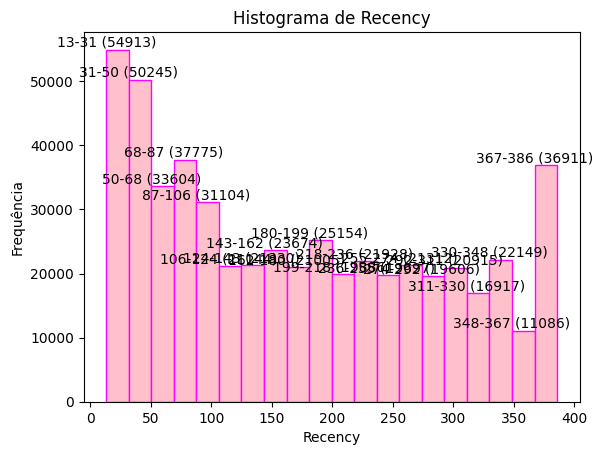

In [48]:
hist, bins, _  = plt.hist(df_tratado_2['Recency'], bins=20, color='pink', edgecolor='magenta')
plt.xlabel('Recency')
plt.ylabel('Frequência')
plt.title('Histograma de Recency')
for i in range(len(hist)):
    plt.text(bins[i], hist[i], f'{int(bins[i])}-{int(bins[i+1])} ({int(hist[i])})', ha='center', va='bottom')

plt.show()

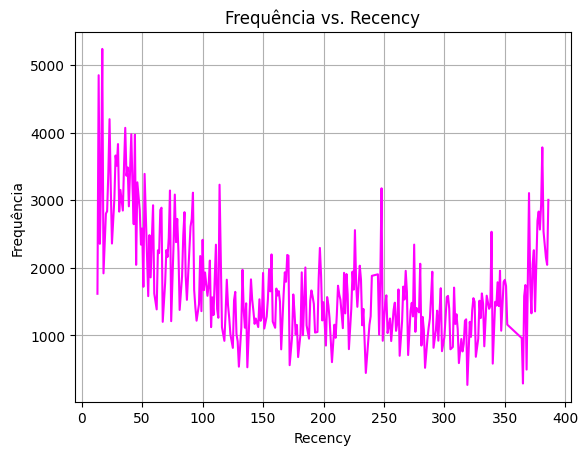

In [49]:
frequencia = df_tratado_2['Recency'].value_counts().sort_index()

# Crie um gráfico de linha
plt.plot(frequencia.index, frequencia.values, color='magenta')
plt.xlabel('Recency')
plt.ylabel('Frequência')
plt.title('Frequência vs. Recency')
plt.grid(True)

plt.show()

Observa-se que, pelo histograma, a maioria dos clientes possuem recência de 13 a 31 dias.
A recência se concentra nos 100 primeiros dias, tendendo a aumentar a partir daí e sendo cada vez menos frequente.
Por volta de 367-386 dias, os clientes voltaram a comprar novamente, porém em uma frequência menor, de apenas 36.911, comparado aos primeiros 30 dias, cujo valor total é de 54.913.
Observando o gráfico de linhas, é possível visualizar uma tendência de aumento da recência, seguido com uma frequência menor de clientes.
Contudo, com base nas observações, é possível concluir que os clientes deixam de comprar novamente a partir do 100° dia, diminuindo também a frequência de clientes.


    
    
    
    [ ] Considerando faturamento crie uma curva ABC e responda: Qual é a média de faturamento do itens da classe A?
    
    [ ] Qual o ticket médio dos clientes únicos (clientes com somente uma compra)?
    
    [ ] Em cada mês do ano de 2011 (até novembro), qual foi a hora com menor quantidade de vendas? Quais foram as 3 horas com a menor?
    
    [ ] Qual a representatividade financeira das vendas feitas para paises da Europa?
    
    [ ] O país de origem interfere no comportamento de compra dos clientes? Considerando somente recência e frequência.